# Project 1
==========
Sentiment prediction
====================
 You have recently started hotel business and collected customer sentiments data from different sources which have similar type of business (train).

Currently customers are visiting your hotel and started dropping their reviews about your hotel and you have collected all the reviews up to data and you are clueless if those reviews represent positive or negative emotions (test).

Use case
========

You would need to build a system to predict if the reviews are positive/negative, so that you can address any issues which are in the form of negative feedback.

Apply every necessary steps/technique that are not only limited to,

1. Perform data cleaning.
2. EDA
3. Build multiple (ML) predictive models and choose the best based on relevant metrics
4. Use pipeline where necessary 
5. Create visualization charts that represents most common positive sentiments and negative sentiments.


 

# Importing Libraries

In [1]:
# Import pandas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Data

In [2]:
#Read data
df=pd.read_csv('Hotel Business Sentiment prediction train.csv')
df.head(3)

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy


# Data analysis

In [3]:
# Check shape
df.shape

(38932, 5)

In [4]:
# Datatypes
df.dtypes

User_ID         object
Description     object
Browser_Used    object
Device_Used     object
Is_Response     object
dtype: object

In [5]:
#Missing value
df.isna().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [6]:
#Duplicates
df.duplicated().sum()

0

# Observation:
1). We can see that there are more than 35k rows & 5 features.

2). The features are of datatypes object

3). No missing value are present in the dataset.

4). No duplicated entries.

So,let's go on further and analyse the data and see what we get

In [7]:
df['Description']

0        The room was kind of clean but had a VERY stro...
1        I stayed at the Crown Plaza April -- - April -...
2        I booked this hotel through Hotwire at the low...
3        Stayed here with husband and sons on the way t...
4        My girlfriends and I stayed here to celebrate ...
                               ...                        
38927    We arrived late at night and walked in to a ch...
38928    The only positive impression is location and p...
38929    Traveling with friends for shopping and a show...
38930    The experience was just ok. We paid extra for ...
38931    The Westin is a wonderfully restored grande da...
Name: Description, Length: 38932, dtype: object

In [8]:
#Kinds of Browser_Used
df['Browser_Used'].value_counts()

Firefox              7367
Edge                 7134
Google Chrome        4659
InternetExplorer     4588
Mozilla Firefox      4328
Mozilla              3092
Chrome               2470
IE                   2439
Internet Explorer    2103
Safari                390
Opera                 362
Name: Browser_Used, dtype: int64

In [9]:
#Types Devices
print("Devices:\n",df['Device_Used'].value_counts())

Devices:
 Desktop    15026
Mobile     14976
Tablet      8930
Name: Device_Used, dtype: int64


In [10]:
#Check response
df['Is_Response'].value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

# Visualization

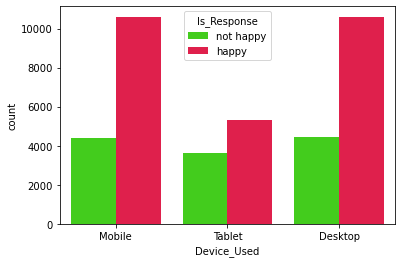

In [11]:
#response based on Device_Used
sns.countplot(x='Device_Used',hue='Is_Response',data=df,palette='prism')

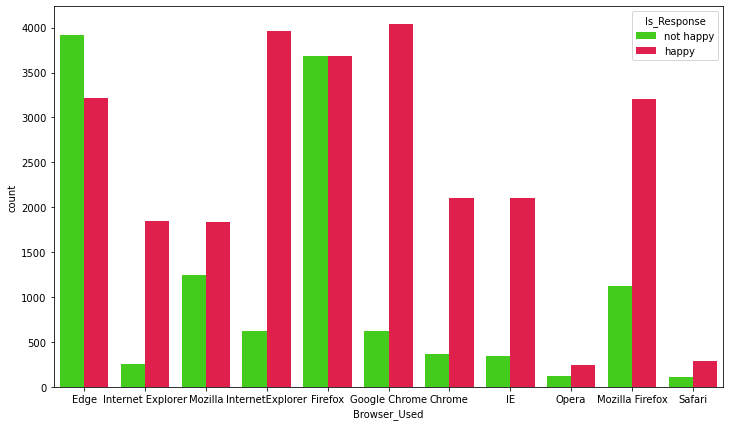

In [12]:
#check response based on Browser_Used
plt.figure(figsize=(12,7))
sns.countplot(x='Browser_Used',hue='Is_Response',data=df,palette='prism')

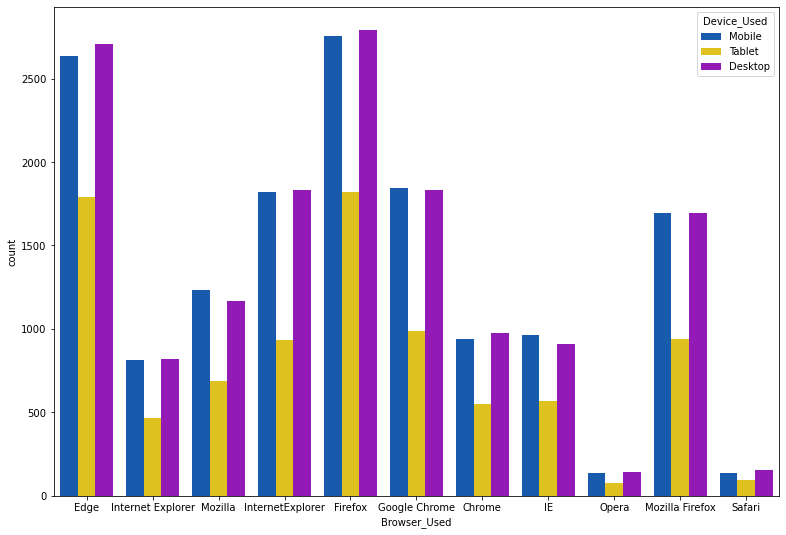

In [13]:
#check Device_Used based on Browser_Used
plt.figure(figsize=(13,9))
sns.countplot(x='Browser_Used',hue='Device_Used',data=df,palette='prism')

# Observation:
a). We can see that there are various kinds of browser_used & the devices used are Mobile,Desktop & Tablets.

b). Descriptionn is the text/review words with two response happy & not happy

c). Response also varies based on the devices & browser_used

However, I find no useful insights or relevant importances on some feature so I'll just drop few of them and select only relevant columns for the problem for further analysis.

In [14]:
#Select only relevant columns and drop the rest
df.drop(['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)
df.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


# Label Data

I will create label & select only revelant feature/Columns for the problem.

In [15]:
# create the label
df["is_bad_review"] = df["Is_Response"]

# select only relevant columns
df = df[["Description", "is_bad_review"]]
df.head()

,Description,is_bad_review
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


# Sample Data

To speed up computation I sample the data.

In [16]:
df=df.sample(frac = 0.1,replace =False, random_state=42)

# Data Cleaning

We are going to perform the following:

1.Lower the text

2.Tokenize the text (split the text into words) and remove the punctuation

3.Remove useless words that contain numbers

4.Remove useless stop words like ‘the’, ‘a’ ,’this’ etc.

5.Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database

6.Lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)

In [17]:
#First let's remove 'No Negative' or 'No Positive' from text
df["Description"] = df["Description"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [18]:
#Below is the various steps/Operations of cleaning Text data
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df["Description_clean"] = df["Description"].apply(lambda x: clean_text(x))

# Feature Engineering

I used vader to determine the sentiment scores:

a) Neutrality score

b) Positivity score

C) Negativity score

d) An overall score that summarizes the previous scores

In [19]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
df["sentiments"] = df["Description"].apply(lambda x: sia.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

In [20]:
#Adding simple metrics for every text

# add number of characters column
df["nb_chars"] = df["Description"].apply(lambda x: len(x))

# add number of words column
df["nb_words"] = df["Description"].apply(lambda x: len(x.split(" ")))

# Representing words to Vectors:
Transforms each text into numerical vectors using Doc2Vec

In [21]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["Description_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df["Description_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)

# TF-IDF
We are going to compute:

-The classic number of times the word appears in the text

-The relative importance of the word which depends on how many texts the word can be found

In [22]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df["Description_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

# Exploratory Data Analysis:
Explore a little for better understanding of the data.

In [23]:
# show is_bad_review distribution
df["is_bad_review"].value_counts(normalize = True)

happy        0.680195
not happy    0.319805
Name: is_bad_review, dtype: float64

From above the dataset is properly balanced as 68% are positive and 31% are negative.

# Word Cloud:
Let's print some wordclouds to have a glimpse at what kind of words appear in our review

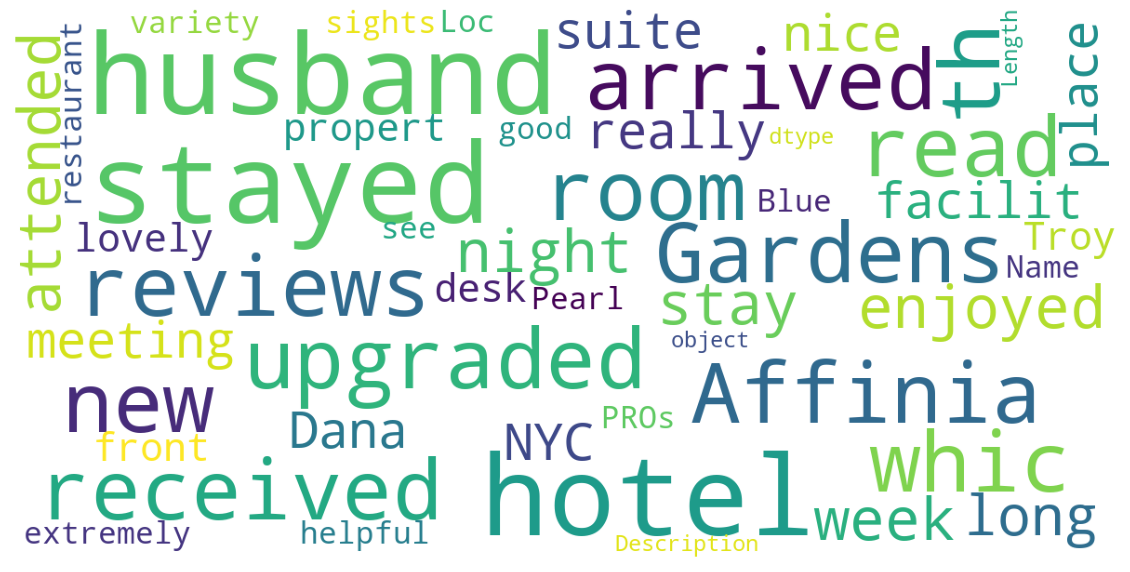

In [24]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 500,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["Description"])

we can see that most of the words are indeed related to hotels: booked,clean,room,stayed,location etc.

In [25]:
# highest positive sentiment reviews (with 10words)
df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Description", "pos"]].head(10)

,Description,pos
13593,Beautiful hotel. Great location. Pure bliss. L...,0.796
19634,"It's a great hotel; great rooms, great service...",0.766
31619,"Very helpful staff, great location",0.713
1467,"Great location, Great room, Great service, fre...",0.711
15888,Super fab! We love the great service and espec...,0.693
11798,"A great location, clean, though small rooms, p...",0.669
7901,"Great hotel, fabulous service, amazing room an...",0.668
28588,"Friendly people, nice surroundings, and great ...",0.634
21190,"Fantastic location, beautiful lobby-bar areas....",0.622
25952,The staff was wonderful and the rooms beautifu...,0.620


In [26]:
# lowest negative sentiment reviews (with 10 words)
df[df["nb_words"] >= 5].sort_values("neg", ascending = False)[["Description", "neg"]].head(10)

,Description,neg
2730,Beautiful! Great service no problems no hidden...,0.345
36442,This is the dirtiest hotel I have ever stayed ...,0.299
12477,Windows hadn't been cleaned in a LIFETIME. The...,0.267
1219,Terrible service. Very noisy. Drug activity is...,0.266
33957,We arrived late and were greated with a dirty ...,0.265
6753,Terrible hotel. The staff was surly. We had an...,0.262
2342,Stayed here - nights during road trip round Ca...,0.261
5395,Stay away from this place. Protestors out fron...,0.261
22326,Was contacted by a rude staff member because o...,0.249
30460,Big rooms. Great breakfast. And - nights a wee...,0.245


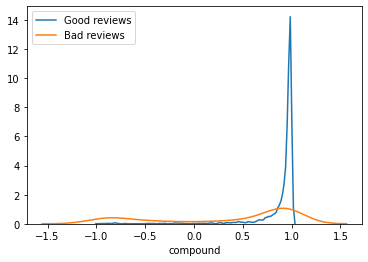

In [27]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in ['happy', 'not happy']:
    subset = df[df['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 'happy':
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

We can see that good reviews are for most of them considered as very positive by Vader. On the contrary, bad reviews tend to have lower compound sentiment scores.

# Feature Selection:
We first choose which features we want to use to train our model. Then we split our data into two parts:

1). One to train our model

2). One to assess its performances

In [28]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "Description", "Description_clean"]
features = [c for c in df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size = 0.20, random_state = 42)

In [29]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
2,pos,0.055888
3,compound,0.044123
0,neg,0.036911
10,doc2vec_vector_4,0.029010
1,neu,0.017108
1011,word_great,0.010163
658,word_dirty,0.009605
198,word_bad,0.008970
9,doc2vec_vector_3,0.008552
7,doc2vec_vector_1,0.008061


The most important features are indeed the ones that come from the previous sentiment analysis. The vector representations of the texts also have a lot of importance in our training. Some words appear to have a fairly good importance as well.

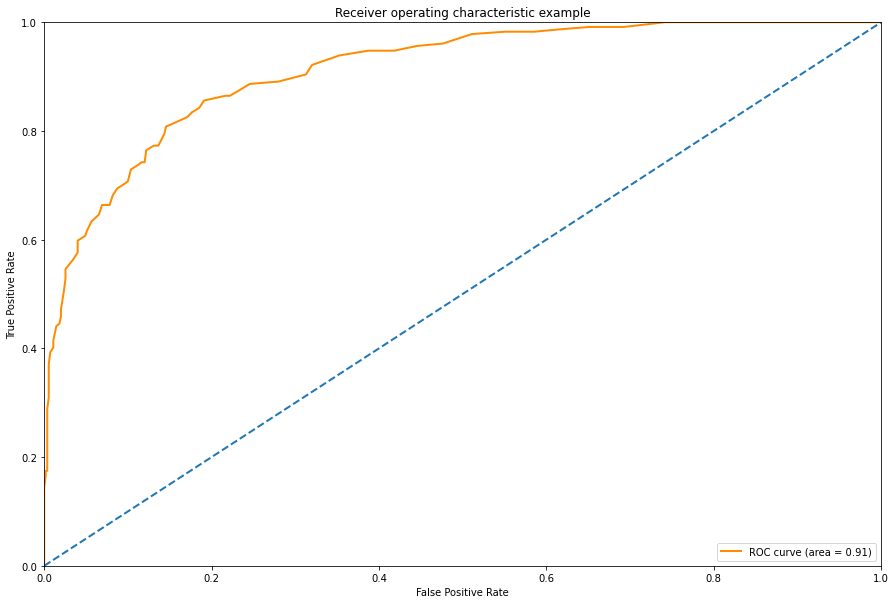

In [30]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 'not happy')

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

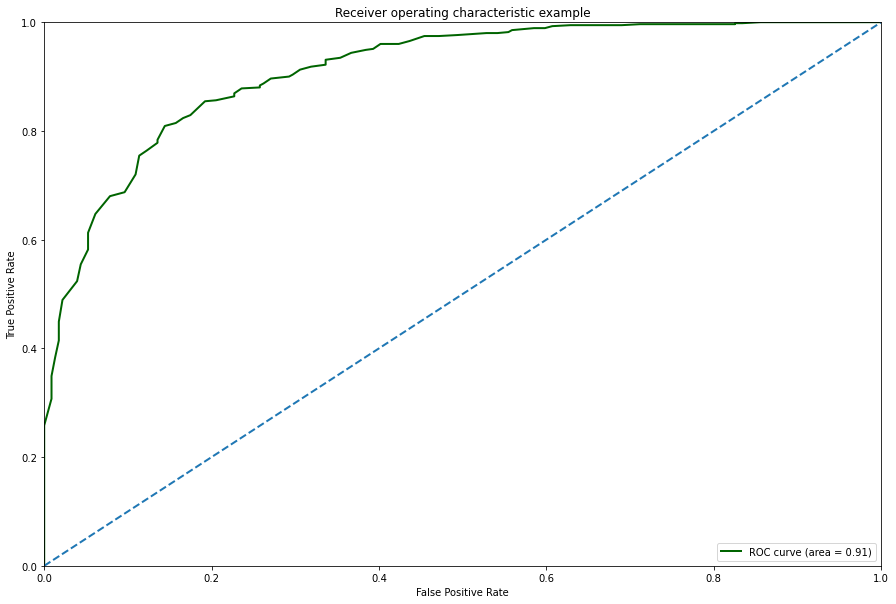

In [31]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[0] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 'happy')

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkgreen',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Converting Text to Matrix

In [32]:
# Converting  a collection of text to matrix of tokens
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=clean_text).fit_transform(df['Description'])

In [33]:
#Split data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(messages_bow,df['is_bad_review'],test_size=0.20,random_state=0)

In [34]:
#Get the shape of messages_bow
messages_bow.shape

(3893, 71)

# Naive Bayes Model

In [35]:
#Create and Train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier =MultinomialNB().fit(X_train,y_train)

# Prediction

In [36]:
#Print the Predictions
print(classifier.predict(X_train))

#Print the actual Values
print(y_train.values)

['not happy' 'not happy' 'happy' ... 'happy' 'happy' 'happy']
['happy' 'happy' 'happy' ... 'happy' 'not happy' 'happy']


# Evaluate Algorithm 

In [37]:
#Evaluate the model on training dataset
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

       happy       0.75      0.93      0.83      2120
   not happy       0.68      0.32      0.44       994

    accuracy                           0.74      3114
   macro avg       0.71      0.63      0.63      3114
weighted avg       0.73      0.74      0.70      3114



In [38]:
# Print Confusion matrix
print('confusion Matrix : \n',confusion_matrix(y_train,pred))

confusion Matrix : 
 [[1972  148]
 [ 674  320]]


In [39]:
#Check Accuracy
print('Accuracy : \n',accuracy_score(y_train,pred))

Accuracy : 
 0.7360308285163777


# Evaluating on Testing part

In [40]:
#Print the Predictions
print(classifier.predict(X_test))

#Print the actual Values
print(y_test.values)

['happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'not happy' 'happy'
 'happy' 'happy' 'not happy' 'happy' 'happy' 'happy' 'happy' 'happy'
 'happy' 'happy' 'happy' 'happy' 'not happy' 'happy' 'happy' 'not happy'
 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'not happy' 'happy'
 'happy' 'happy' 'not happy' 'not happy' 'happy' 'happy' 'happy' 'happy'
 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'not happy' 'happy'
 'happy' 'happy' 'happy' 'happy' 'not happy' 'happy' 'not happy' 'happy'
 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy'
 'not happy' 'not happy' 'happy' 'not happy' 'happy' 'happy' 'happy'
 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy'
 'happy' 'happy' 'not happy' 'happy' 'happy' 'happy' 'not happy' 'happy'
 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy'
 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'not happy'
 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy'
 'happy' '

In [41]:
#Evaluate the model on training dataset
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test,pred))

# Print Confusion matrix
print('confusion Matris : \n',confusion_matrix(y_test,pred))

#Check Accuracy
print('Accuracy : ',accuracy_score(y_test,pred))


              precision    recall  f1-score   support

       happy       0.73      0.92      0.81       528
   not happy       0.62      0.27      0.38       251

    accuracy                           0.71       779
   macro avg       0.67      0.60      0.60       779
weighted avg       0.69      0.71      0.67       779

confusion Matris : 
 [[486  42]
 [182  69]]
Accuracy :  0.7124518613607189


# Decision Tree Model

In [42]:
#Create and Train the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
DTC =DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth = 3,min_samples_leaf = 5).fit(X_test,y_test)

In [43]:
#Evaluate the model on training dataset
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred = DTC.predict(X_test)
print(classification_report(y_test,pred))

# Print Confusion matrix
print('confusion Matris : \n',confusion_matrix(y_test,pred))

#Check Accuracy
print('Accuracy : ',accuracy_score(y_test,pred))


              precision    recall  f1-score   support

       happy       0.73      0.94      0.82       528
   not happy       0.67      0.25      0.37       251

    accuracy                           0.72       779
   macro avg       0.70      0.60      0.59       779
weighted avg       0.71      0.72      0.67       779

confusion Matris : 
 [[497  31]
 [188  63]]
Accuracy :  0.7188703465982028


# LogisticRegression Model

In [44]:
#Create and Train the LogisticRegression
from sklearn.linear_model import LogisticRegression
LR =LogisticRegression().fit(X_test,y_test)

C:\Users\lklqy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
#Evaluate the model on training dataset
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred = LR.predict(X_test)
print(classification_report(y_test,pred))

# Print Confusion matrix
print('confusion Matris : \n',confusion_matrix(y_test,pred))

#Check Accuracy
print('Accuracy : ',accuracy_score(y_test,pred))


              precision    recall  f1-score   support

       happy       0.76      0.92      0.83       528
   not happy       0.71      0.39      0.50       251

    accuracy                           0.75       779
   macro avg       0.74      0.66      0.67       779
weighted avg       0.74      0.75      0.73       779

confusion Matris : 
 [[488  40]
 [153  98]]
Accuracy :  0.7522464698331194


# Support Vector Machine model

In [46]:
#Create and Train the SVM Model
from sklearn.svm import SVC
SV =SVC(kernel='rbf',random_state=42).fit(X_test,y_test)

In [47]:
#Evaluate the model on training dataset
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred = SV.predict(X_test)
print(classification_report(y_test,pred))

# Print Confusion matrix
print('confusion Matris : \n',confusion_matrix(y_test,pred))

#Check Accuracy
print('Accuracy : ',accuracy_score(y_test,pred))

              precision    recall  f1-score   support

       happy       0.68      1.00      0.81       528
   not happy       0.86      0.02      0.05       251

    accuracy                           0.68       779
   macro avg       0.77      0.51      0.43       779
weighted avg       0.74      0.68      0.56       779

confusion Matris : 
 [[527   1]
 [245   6]]
Accuracy :  0.6842105263157895


# Nearest Neighbors Model

In [48]:
#Create and Train the SVM Model
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=7).fit(X_test,y_test)

In [49]:
#Evaluate the model on training dataset
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

# Print Confusion matrix
print('confusion Matris : \n',confusion_matrix(y_test,pred))

#Check Accuracy
print('Accuracy : ',accuracy_score(y_test,pred))

              precision    recall  f1-score   support

       happy       0.75      0.92      0.83       528
   not happy       0.68      0.36      0.47       251

    accuracy                           0.74       779
   macro avg       0.72      0.64      0.65       779
weighted avg       0.73      0.74      0.71       779

confusion Matris : 
 [[486  42]
 [161  90]]
Accuracy :  0.7394094993581515


# HyperParameter Tunning